In [99]:
'''
Gradient descent demo
'''

'\nGradient descent demo\n'

In [5]:
import numpy as np
import pandas as pd                 # for loading data from csv file
import matplotlib.pyplot as plt     # for plotting
%matplotlib inline

In [61]:
#dataset movie_metadata.csv using num_critic_for_reviews & num_voted_users columns
points = pd.read_csv('data1.csv')

In [72]:
points=points[0:]
points

,a,b
0,723,886204
1,302,471220
2,602,275868
3,813,1144337
4,462,212204
5,392,383056
6,324,294810
7,635,462669
8,375,321795
9,673,371639


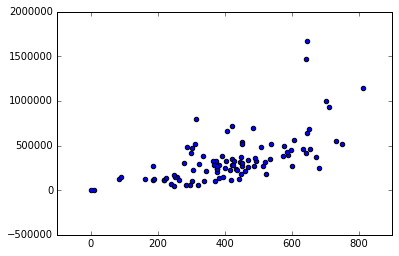

In [57]:
plt.scatter(points['a'].get_values(),points['b'].get_values())

In [87]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    err=[]
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
        err.append(totalError)
    return [totalError / float(len(points)),err]

In [27]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [35]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for _ in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

In [90]:
def run():
	points = np.genfromtxt("data1.csv", delimiter=",")
	learning_rate = 0.000000001
	initial_b = 0 # initial y-intercept guess
	initial_m = 0 # initial slope guess
	num_iterations = 10000
	err,lierr = compute_error_for_line_given_points(b, m, points)
	print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, err))
	print ("Running...")
	[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
	err,lierr = compute_error_for_line_given_points(b, m, points)
	print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, err))
	print("y = {0}x + {1}".format(m,b))
	line =[]
	for i in range(0,1000):
		line.append(m*i+b)
	return [b, m,line,lierr]

In [93]:
[m,b,line,lierr]=run()

Starting gradient descent at b = 0, m = 0, error = [203272380449.31314, [785357529616.0, 1007405818016.0, 1083508971440.0, 2393016141009.0, 2438046678625.0, 2584778577761.0, 2671691513861.0, 2885754117422.0, 2989306139447.0, 3127421685768.0, 3185211922584.0, 3294629977240.0, 3567155738840.0, 3600204070104.0, 3901136406433.0, 3923613012517.0, 4914464034742.0, 5051885490358.0, 5123792058074.0, 5249269534058.0, 5453395484867.0, 5498239900092.0, 5732050831692.0, 5754257494053.0, 5854124870377.0, 6483067447858.0, 6557416376758.0, 6598374850682.0, 6773277800478.0, 7045793121378.0, 7214848956274.0, 7525642941395.0, 7619474883795.0, 7766491148124.0, 7821727898749.0, 7926190663598.0, 7984958119998.0, 8015726437279.0, 8118913222808.0, 8188705880297.0, 8198942867981.0, 8248847300430.0, 8545745873886.0, 8627596222911.0, 8705009268735.0, 8921251939096.0, 9185576454721.0, 9342054453050.0, 9353378818106.0, 9485083937850.0, 9534547032259.0, 9679820830163.0, 9786214222563.0, 9897668041972.0, 9901616404

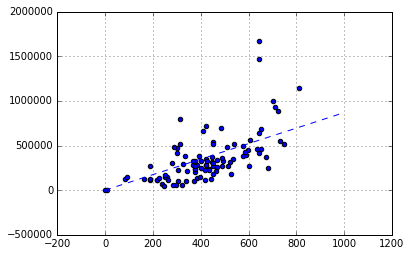

In [86]:
plt.scatter(points['a'].get_values(),points['b'].get_values())
plt.plot(line,'--')
plt.grid()

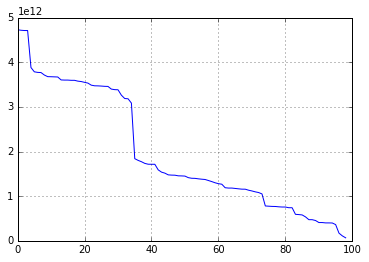

In [98]:
#Error
plt.plot(sorted(lierr,reverse=True))
plt.grid()